FISICA EXPERIMENTAL III - GRUPO1
*  Estiven Castrillon Alzate
*  Sofía Moscoso Ortiz
*  Ana María Hurtado Roldan
*  Juan Sebastián Duque Gaitan

Code to run in Google colab:

In [8]:
# ## Ejecutar antes de comenzar para cargar la carpeta con el archivo de audio

# !git clone https://github.com/jmmarinr/FisExperimental3.git

In [9]:
#Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.io import wavfile
from IPython.display import Audio

# Tarea 1







A continuación, se adjunta un archivo de audio en formato .wav correspondiente a la grabación de una nota musical proveniente de un piano. Tomando como base este archivo de audio, realice lo siguiente:


In [10]:
Audio('FisExperimental3/Tarea1/archivo_audio_tarea1.wav')

## Punto 1

Grafique la señal en función del tiempo. Imprima la frecuencia de muestreo y el número de muestras.



Frecuencia de muestreo = 11025 Hz
Número de muestras = 11250


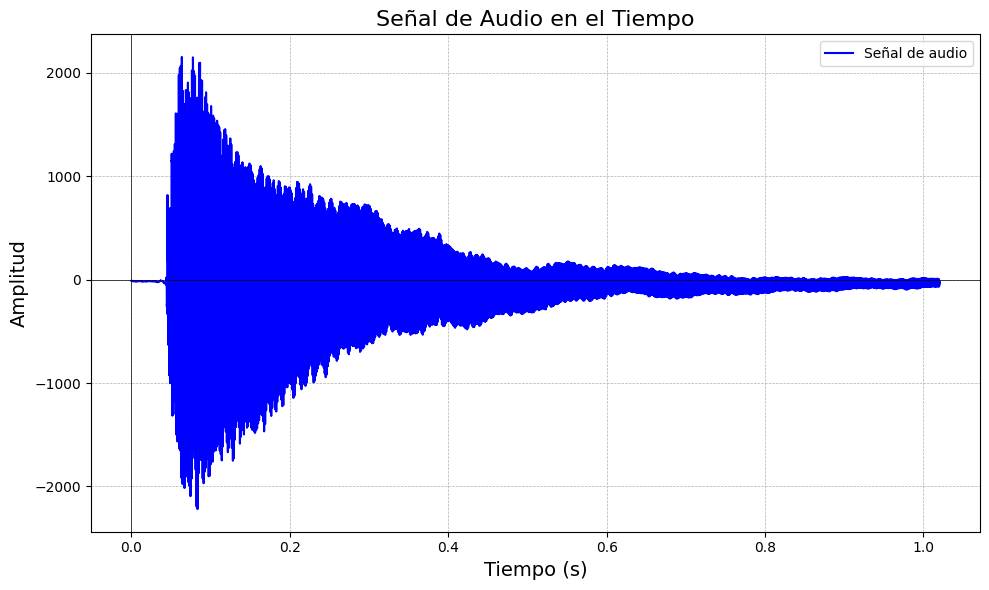

In [11]:
# Leyendo el archivo con la función wavfile.read
audio_path = 'FisExperimental3/Tarea1/archivo_audio_tarea1.wav'
frecuencia_de_muestreo, data = wavfile.read(audio_path)

# Frecuencia de muestreo y número de muestras
print('Frecuencia de muestreo =', frecuencia_de_muestreo, 'Hz')
print('Número de muestras =', len(data))

# Gráfica de la señal de audio
t_inicial, t_final = 0, len(data) / frecuencia_de_muestreo # len(data) / frecuencia_de_muestreo = duración del audio en segundos, (recordar que 1/s^-1 = s)
t = np.linspace(t_inicial, t_final, len(data)) # Vector de tiempo en segundos

plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Señal de audio', color='b', linewidth=1.5)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.title('Señal de Audio en el Tiempo', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Punto 2

Calcule la transformada de Fourier y realice un código para identificar y hacer una lista con la frecuencia fundamental y las secundarias $^1$. Grafique la magnitud de la transformada en función de la frecuencia y superponga los puntos correspondientes a los máximos.



$^1$ Puede emplear la librería <code> find_peaks </code> de <code >scipy.signal </code>.

Frecuencia fundamental: 784.0 Hz
Frecuencias secundarias mayores a la frecuencia dominante, (solamente positivas): [1571.92, 2367.68, 3175.2, 3998.4, 4833.36]


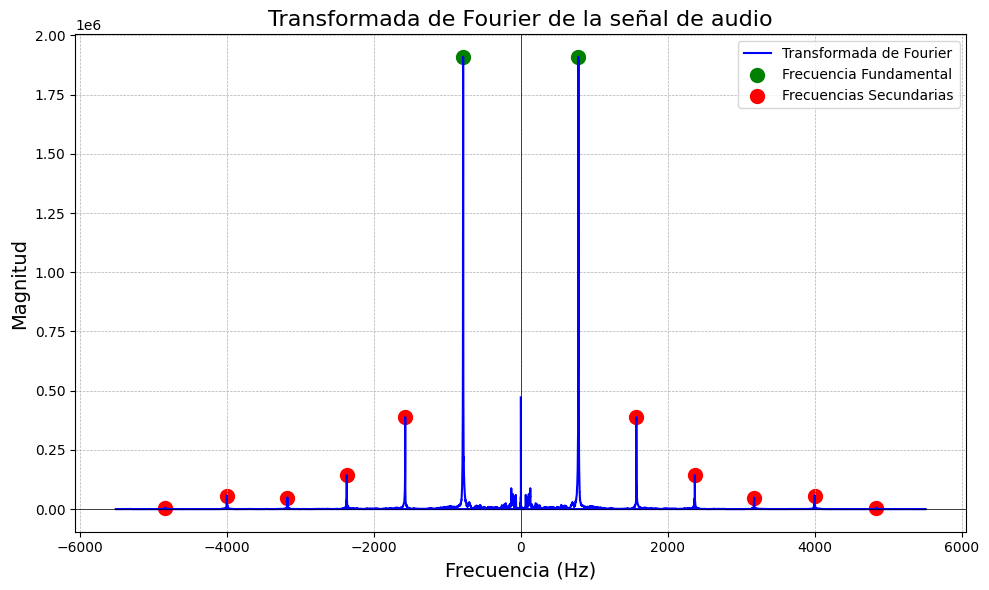

In [12]:
# Calculando la transformada de Fourier de data
transformada_de_fourier = np.fft.fft(data)
frecuencias = np.fft.fftfreq(len(data), 1 / frecuencia_de_muestreo) # Frecuencias en Hz

# Encontrando la frecuencia fundamental
frecuencia_fundamental = frecuencias[np.argmax(np.abs(transformada_de_fourier))] # La frecuencia fundamental será la frecuencia con mayor magnitud en la transformada de Fourier
print(f"Frecuencia fundamental: {frecuencia_fundamental} Hz")

magnitud = np.abs(transformada_de_fourier) # Magnitud de la transformada de Fourier
indices_de_picos, propiedades_indices_de_picos = find_peaks(magnitud, height=5000, distance=500) # Encontrando los picos de la transformada de Fourier
# Los anteriores parámetros height y distance se ajustaron manualmente para obtener los picos deseados, los multiplos de la frecuencia fundamental

# Filtrando los picos para obtener solo aquellos mayores a la frecuencia fundamental
frecuencias_de_picos = frecuencias[indices_de_picos]
magnitudes_de_picos = magnitud[indices_de_picos]
indices_de_picos_mayores = [i for i, f in enumerate(frecuencias_de_picos) if np.abs(f) > np.abs(frecuencia_fundamental)] # Indices de los picos mayores a la frecuencia fundamental

# Calculando las frecuencias secundarias, estas serán las frecuencias con magnitud mayor a la frecuencia fundamental
frecuencias_secundarias_mayores = frecuencias_de_picos[indices_de_picos_mayores]
magnitudes_secundarias_mayores = magnitudes_de_picos[indices_de_picos_mayores]
print(f"Frecuencias secundarias mayores a la frecuencia dominante, (solamente positivas): {sorted(set(abs(frecuencias_secundarias_mayores)))}")

# Gráfica de la transformada de Fourier y los puntos máximos con la función find_peaks de scipy
plt.figure(figsize=(10, 6))

# Gráfica del espacio de las frecuencias y sus magnitudes, (transformada de Fourier)
plt.plot(frecuencias, magnitud, label='Transformada de Fourier', color='b', linewidth=1.5)

#Gráficas de las frecuencias fundamentales y secundarias
plt.scatter(frecuencia_fundamental, magnitud[np.argmax(magnitud)], color='g', s=100, label='Frecuencia Fundamental')
plt.scatter(-frecuencia_fundamental, magnitud[np.argmax(magnitud)], color='g', s=100)
plt.scatter(frecuencias_secundarias_mayores, magnitudes_secundarias_mayores, color='r', s=100, label='Frecuencias Secundarias')

plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('Magnitud', fontsize=14)
plt.title('Transformada de Fourier de la señal de audio', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5) # Líneas para diferencias el eje x y el eje y
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Punto 3

Con base en la ecuación $f_N =440 Hz \times 2^{\frac{N}{12}}$ , con $f_N$ la frecuencia de la nota $N$ y siendo $N=0$ la nota La4, identifique el nombre de la nota musical presente en la grabación.

N = 10.000201567086583
f_N = 784.0


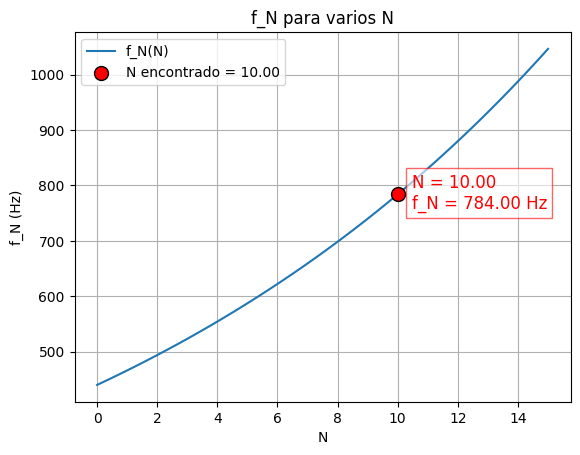

In [13]:
from scipy.optimize import newton

# Definimos la función f_N
f_N = lambda N: 440 * 2 ** (N / 12)

# Gráfica de f_N para varios N
N_vals = np.linspace(0, 15, 100)
plt.plot(N_vals, f_N(N_vals), label='f_N(N)')
plt.xlabel('N')
plt.ylabel('f_N (Hz)')
plt.title('f_N para varios N')
plt.legend()
plt.grid(True)

# ¿Para qué valor de N se cumple f_N = 784 Hz?
# Definimos la función que queremos encontrar, simplemente será f_N=784, es decir, f_N - 784 = 0
f_a_encontrar = lambda x: 440 * 2 ** (x / 12) - 784

# Usaremos el método de Newton para encontrar la raíz, es decir, para encontrar el N que cumple f(N) = 784 Hz
N_encontrado = newton(f_a_encontrar, x0=5, tol=1e-6)
print('N =', N_encontrado)
print('f_N =', f_N(N_encontrado))

# Texto del punto encontrado
plt.scatter(N_encontrado, f_N(N_encontrado), color='red', s=100, edgecolor='black', zorder=5, label=f'N encontrado = {N_encontrado:.2f}')
plt.annotate(f'N = {N_encontrado:.2f}\nf_N = {f_N(N_encontrado):.2f} Hz',
             (N_encontrado, f_N(N_encontrado)),
             textcoords="offset points",
             xytext=(10,-10),
             ha='left',
             fontsize=12,
             color='red',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='red'))

# Leyenda y mostrando gráfica
plt.legend()
plt.show()

Según el sitio web 'https://www.ciudadpentagrama.com/2020/01/tabla-frecuencias-notas-musicales.html', las frecuencias de las notas musicales están representadas e identificadas en la siguiente imagen:

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgs4ia4Rd7FI71hw910jjOkROUdr9jSI57eebJ7q1CI9ib1p8WXOi9gvwtGYc_V-cDuALghLxkufDOqc2twadxB4S42259NsnxWIGBdnOxQz11iohkT0YIPphWLie47ADNzfhh3dvrt0AU/s1600/FRECUENCIA_NOTAS_MUSICALES.jpg" alt="Frecuencia Notas Musicales" width="600">

Además, sabemos que de la función $f_N =440 Hz \times 2^{\frac{N}{12}}$:
- 440 Hz es la frecuencia de referencia y corresponde a la nota La4 (A4) en la escala musical.
- N es un número de semitonos que desplaza hacia arriba o hacia abajo desde la nota de referencia (La4 a 440 Hz).
- El factor $2^{\frac{N}{12}}$ indica que hay 12 semitonos en una octava, por lo que una octava completa significa duplicar la frecuencia (multiplicar por 2).

Para ( N = 10 ), la fórmula de la frecuencia es:
$$f_{10} = 440 , \text{Hz} \times 2^{\frac{10}{12}} $$
Calculamos el valor:
$$ f_{10} = 440 \times 2^{\frac{10}{12}} \approx 440 \times 1.781797 $$
Realizando la multiplicación:
$$f_{10} \approx 440 \times 1.781797 \approx 783.99 , \text{Hz} $$

Por lo tanto, para ( N = 10 ), la frecuencia es aproximadamente 783.99 Hz. Esta corresponde a la nota Sol5 (G5) en la escala musical, que es precisamente el resultado computacional que obtuvimos, entonces se concluye que la nota musical que estamos analizando es **Sol en la octava 5**.

## Punto 4

En la señal de la grabación puede identificar que esta desaparece gradualmente. Este decaimiento en la amplitud se puede modelar con la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. Realice un código para encontrar la amplitud de las oscilaciones1 $r’(t)={…}$ y ajuste $^2$ los valores de $r’(t)$ al modelo $r(t)$ con el fin de hallar los parámetros $r_0$ y τ. Superponga las gráficas de la grabación con la de $r’(t)$ y $r(t)$ y compruebe si el modelado del decaimiento es correcto.


$^2$ Para realizar el ajuste, puede linealizar el modelo aplicando logaritmo natural a ambos lados de la ecuación $r(t)=r_0 \cdot e^{-t/τ}$. De este modo se puede hacer un ajuste lineal en lugar de uno exponencial.

Proceso para la linearización del modelo y el ajuste
#### 1. Aplicar el logaritmo natural a las amplitudes (magnitudes)

Primero se aplica el **logaritmo natural** a las magnitudes de la señal de audio. Las magnitudes son el resultado de la **Transformada de Fourier**. Debido a la simetría de la transformada, solo se toma la mitad positiva de las frecuencias:

$$
\ln(A_i) = \ln \left( |\mathcal{F}(x_i)| \right)
$$

Donde $ A_i $ son las amplitudes de las componentes de frecuencia.


### 2. Ajuste del vector de tiempo

Para poder relacionar las magnitudes con el tiempo, es necesario ajustar el vector de tiempo \( t \) para que coincida con las frecuencias obtenidas en la **Transformada de Fourier**. Esto permite graficar y ajustar los datos correctamente en los siguientes pasos.


### 3. Ajuste lineal de $\ln(A_i)$ en función del tiempo

La relación entre la magnitud de las frecuencias y el tiempo sigue un modelo de **decaimiento exponencial**. Esto significa que el logaritmo natural de las magnitudes se comporta de manera lineal en función del tiempo:

$$
\ln(A_i) = \ln(r_0) - \frac{t}{\tau}
$$

Donde:
- $ A_i $ es la amplitud de la señal de audio en un instante de tiempo $ t $,
- $ r_0 $ es la amplitud inicial,
- $ \tau $ es la **constante de tiempo** del decaimiento exponencial.

Al realizar un ajuste lineal de los datos de $ \ln(A_i)$ en función del tiempo, se obtiene una recta cuya **pendiente** es:

$$
\text{pendiente} = -\frac{1}{\tau}
$$

De este modo, podemos despejar el valor de $\tau$:

$$
\tau = -\frac{1}{\text{pendiente}}
$$


### 4. Cálculo de \(r_0\)

El valor de \(r_0\), la amplitud inicial, se obtiene del **intercepto** del ajuste lineal. Como la ecuación tiene la forma:

$$
\ln(r_0) = \text{intercepto}
$$

Esto implica que:

$$
r_0 = e^{\text{intercepto}}
$$

τ = 0.10676063651617997
r0 = 11472.774950563928


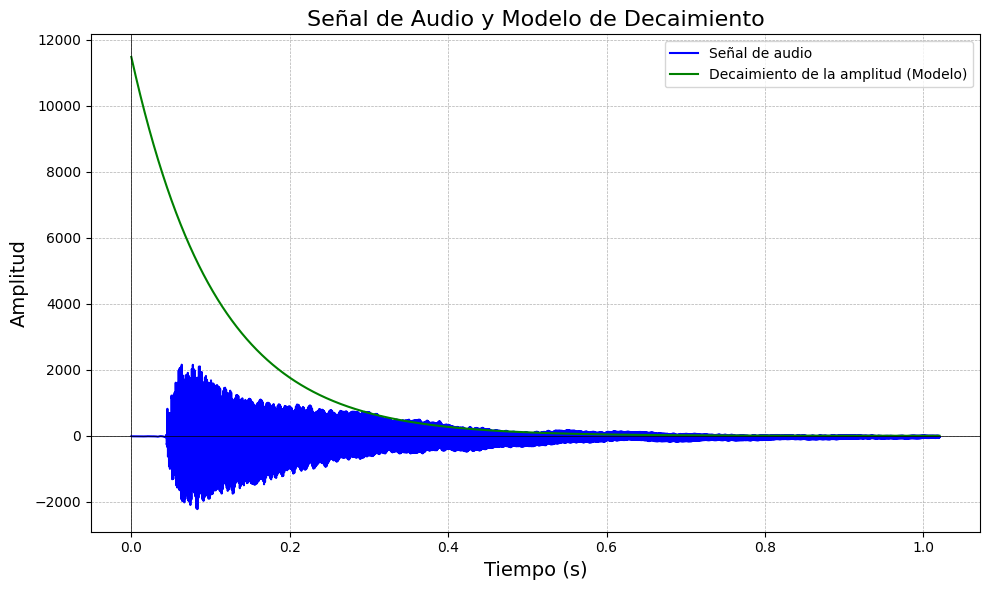

In [14]:
from scipy.stats import linregress

#Aplicar logaritmo natural a las amplitudes (magnitudes)
ln_magnitud = np.log(magnitud[:len(magnitud)//2]) # Solo tomamos la mitad positiva de las frecuencias

#Ajustar el vector de tiempo t para que coincida con las frecuencias
t_frecuencias = t[:len(ln_magnitud)]

#Ajuste lineal de ln(magnitud) vs tiempo para encontrar τ
pendiente, intercepto, _, _, _ = linregress(t_frecuencias, ln_magnitud)

# τ es el inverso de la pendiente negativa
τ = -1 / pendiente
print(f"τ = {τ}")

# r0 se puede encontrar con el intercepto (ln(r0) = intercepto)
r0 = np.exp(intercepto)
print(f"r0 = {r0}")

# Definimos la función de decaimiento exponencial
def r(t0):    # Función de la amplitud dependiente del tiempo
    return r0 * np.exp(-t0 / τ)

# Evaluar la función de decaimiento en el tiempo
R = r(t)

#Graficamos la señal junto con la función de decaimiento
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Señal de audio', color='b', linewidth=1.5)
plt.plot(t, R, label='Decaimiento de la amplitud (Modelo)', color='green')
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.title('Señal de Audio y Modelo de Decaimiento', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Punto 5

Con base en los resultados del punto 2), construya la siguiente tabla:

| Frecuencia ($f_i$) | Amplitud ($A_i$) |
|:--------:|:--------:|
|Valor 1|Valor 2|

In [15]:
frecuencia = pd.DataFrame(np.append(frecuencias_secundarias_mayores, frecuencia_fundamental)) # Se añade la frecuencia fundamental
amplitud = pd.DataFrame(np.append(magnitudes_secundarias_mayores, magnitud[np.argmax(magnitud)])) # Se añade la amplitud de la frecuencia fundamental

data_frecuencia_amplitud = pd.concat([frecuencia, amplitud], axis = 1) # Se concatenan las dos tablas
data_frecuencia_amplitud = data_frecuencia_amplitud.set_axis(['Frecuencias', 'Amplitudes'], axis = 1)  # Se renombran las columnas
data_frecuencia_amplitud = data_frecuencia_amplitud.sort_values(by = 'Frecuencias').reset_index(drop=True) # Se ordenan las frecuencias
# Seleccionando solo los valores después de la fila 5, (positivos)
data_frecuencia_amplitud = data_frecuencia_amplitud.iloc[5:].reset_index(drop=True) # Se elimina la fila 10
data_frecuencia_amplitud

,Frecuencias,Amplitudes
0,784.00,1.909006e+06
1,1571.92,3.885212e+05
2,2367.68,1.437265e+05
3,3175.20,4.896581e+04
4,3998.40,5.718295e+04
5,4833.36,5.604459e+03


## Punto 6
Usando la tabla anterior, sintetice la señal del piano, usando la ecuación para $S(t)$ y cree un archivo de audio con ella o reprodúzcala en su tarjeta de sonido.


$$S(t)=r(t)\sum_i A_i \sin (2π ×f_i×t)$$

Compare ambas señales sintética y real y concluya sobre sus diferencias, tanto a nivel físico (comparando las gráficas en función del tiempo) como subjetivo (calidad o riqueza del sonido). ¿Las frecuencias que se excluyeron de $S(t)$ qué tanto afectan la calidad del sonido?



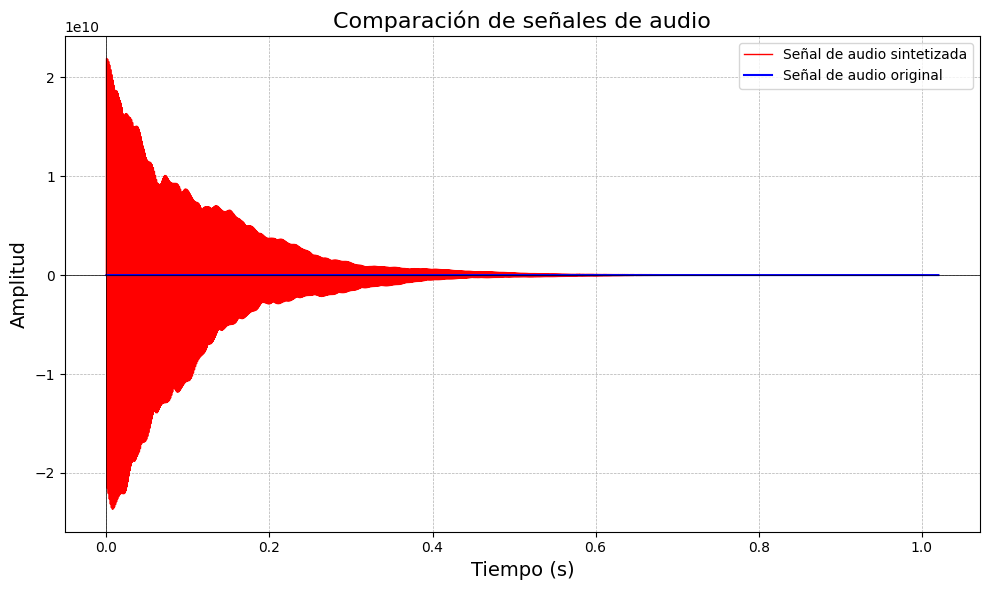

In [16]:
from scipy.io.wavfile import write

# Definir la función S(t) para sintetizar la señal usando las amplitudes ajustadas
def S(t, data_frecuencia_amplitud):
    suma = 0
    for i in range(len(data_frecuencia_amplitud)):
        # Usamos las frecuencias y amplitudes ajustadas
        frecuencia_i = data_frecuencia_amplitud.iloc[i, 0]
        amplitud_i = data_frecuencia_amplitud.iloc[i, 1]
        suma += amplitud_i * np.sin(2 * np.pi * frecuencia_i * t)
    return r(t) * suma

# Crear el vector de tiempo para la señal sintetizada
t_reconstruido = np.linspace(t_inicial, t_final, len(data))

# Sintetizar la señal con la envolvente r(t)
señal_sintetizada = S(t_reconstruido, data_frecuencia_amplitud)

# Graficar la señal original y la señal sintetizada para comparar
plt.figure(figsize=(10, 6))
plt.plot(t_reconstruido, señal_sintetizada, label='Señal de audio sintetizada', color='r', linewidth=1)
plt.plot(t, data, label='Señal de audio original', color='b', linewidth=1.5)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.title('Comparación de señales de audio', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Crear archivo de audio con la señal sintetizada (normalizada)
señal_sintetizada_normalizada = np.int16((señal_sintetizada / np.max(np.abs(señal_sintetizada))) * 32767) # normalizando para que los valores estén entre -32767 y 32767, la cual es    la amplitud máxima de un archivo de audio
write('señal_reconstruida.wav', int(frecuencia_de_muestreo), señal_sintetizada_normalizada)

Ambas disminuyen su amplitud en funcion del tiempo, lo cual es positivo, debido a que tienen el mismo comportaminto, sin embargo, la diferencia de amplitudes es gigantisima, esto indica que el sonido va a ser, a pesar de estar en el mismo tono, muy diferente, a un timbre mucho mayor, y la calidad del sonido comparada con la original sera demasiado baja debido a la informacion que falta en la sintetizacion.

La señal se guarda como un archivo de audio con este código:


señal_sintetizada_normalizada = np.int16((señal_sintetizada / np.max(np.abs(señal_sintetizada))) * 32767)


write('señal_sintetizada.wav', int(frecuencia_de_muestreo), señal_sintetizada_normalizada)

 donde señal_sintetizada es S(t)

## Punto 7

Escriba sus conclusiones y aportes personales sobre este ejercicio. Además discuta sobre la importancia de la transformada de Fourier en el análisis de señales de auido

El sonido es una onda mecánica que se da cuando de determinada manera se perturba el aire. Las notas musicales son todas ondas sonoras que se diferencian entre sí por la diferencia de vibración entre ellas, específicamente, el valor asociado a sus frecuencias. Es decir, cada nota musical es una onda sonora que tiene un determinado valor de frecuencia que la define.

Al graficar la señal  de una nota musical en función del tiempo, observamos que la amplitud de esta disminuye/decae rápidamente. Esto es debido, además de que las ondas sonoras son ondas esféricas, a que también hay pérdida de energía dada la existencia de fuerzas no conservativas. Es así entonces como la amplitud de la señal llega a cero y lo notamos decrecientemente desde el primer timbre hasta que el sonido es nulo.

Por otro lado, cualquier onda puede representarse como la superposición de funciones armónicas con una frecuencia múltiplo de la frecuencia fundamental. La transformada de fourier nos da el valor de esas frecuencias que presentan cada uno de los términos de la suma de curvas sinusoidales. La señal sonora entonces, al ser sometida al análisis de fourier, es descompuesta en la suma de otras, que con distintas frecuencias y amplitudes, dan ella misma. La transformada de Fourier nos permite visualizar gráficamente estas frecuencias que componen a la señal principal en un llamado “mapa de frecuencias”, lo que nos permite obtener la frecuencia fundamental. En este caso, obtuvimos una frecuencia fundamental de 784 Hz, lo que implica que la nota musical es SOL7/G5 (sol en octava 5), que además concuerda con el resultado del punto 3 dado N=10.

Después de obtener los resultado del análisis de fourier, es decir, tanto las amplitudes como las frecuencias de cada una de las ondas en las que se descompone la nota musical SOL7, podemos sintetizar de nuevo la nota musical digitalmente, buscando obtener el mismo sonido original a partir de superposición “manual” de cada una de las ondas obtenidas. Estas, además, se deben multiplicar por la función amplitud que decrece exponencialmente dada la pérdida de energía. Al realizar la comparación entre la señal inicial y la obtenida al sintetizar, nos damos cuenta que la diferencia entre amplitudes es bastante grande, lo que quiere decir que escucharemos la señal al mismo tono pero a un diferente timbre, debido a la falta de información de la señal original en el momento de realizar la sintetización digital.



Por otro lado, la transformada de Fourier es sumamente importante en el analisis de audio, pues esta nos permite expandir una señal de sonido en la superposicion de muchas señales que componen la misma, obteniendo una mayor informacion de esta. Que a su vez, permite recrearla en incluso modificarla en diferentes timbres y analizarla pudiendo determinar el "lugar" de donde viene la señal de sonido.